Import dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("BTC-USD.csv")

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-06,36573.183594,36624.359375,35482.132813,36040.921875,36040.921875,37795577489
1,2022-05-07,36042.503906,36129.925781,34940.824219,35501.953125,35501.953125,24375896406
2,2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910
3,2022-05-09,34060.015625,34222.074219,30296.953125,30296.953125,30296.953125,63355494961
4,2022-05-10,30273.654297,32596.308594,29944.802734,31022.906250,31022.906250,59811038817


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

Kich thuoc cua mang

In [ ]:
dataset.shape

(366, 7)

Drop column Adj Close
axis = 1 là xóa cột, inplace = true là xóa thẳng vô bảng , false là xóa trên bảng tạm


In [ ]:
dataset.drop('Adj Close',axis =1, inplace = True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2022-05-06,36573.183594,36624.359375,35482.132813,36040.921875,37795577489
1,2022-05-07,36042.503906,36129.925781,34940.824219,35501.953125,24375896406
2,2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,36763041910
3,2022-05-09,34060.015625,34222.074219,30296.953125,30296.953125,63355494961
4,2022-05-10,30273.654297,32596.308594,29944.802734,31022.906250,59811038817


In [ ]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Open    366 non-null    float64       
 2   High    366 non-null    float64       
 3   Low     366 non-null    float64       
 4   Close   366 non-null    float64       
 5   Volume  366 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 17.3 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,22531.457602,22961.302590,22071.867652,22512.150385,2.854099e+10
std,4502.059042,4615.947351,4340.442004,4457.238583,1.310973e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,7.714767e+09
25%,19326.514648,19636.722168,19025.690430,19325.394043,1.954390e+10
50%,21528.958985,21803.812500,20959.862305,21531.104492,2.675402e+10
75%,24738.201172,25228.042969,24302.009765,24719.875000,3.349916e+10
max,36573.183594,36624.359375,35482.132813,36040.921875,1.189925e+11


In [ ]:
print(len(dataset))

366


<Axes: >

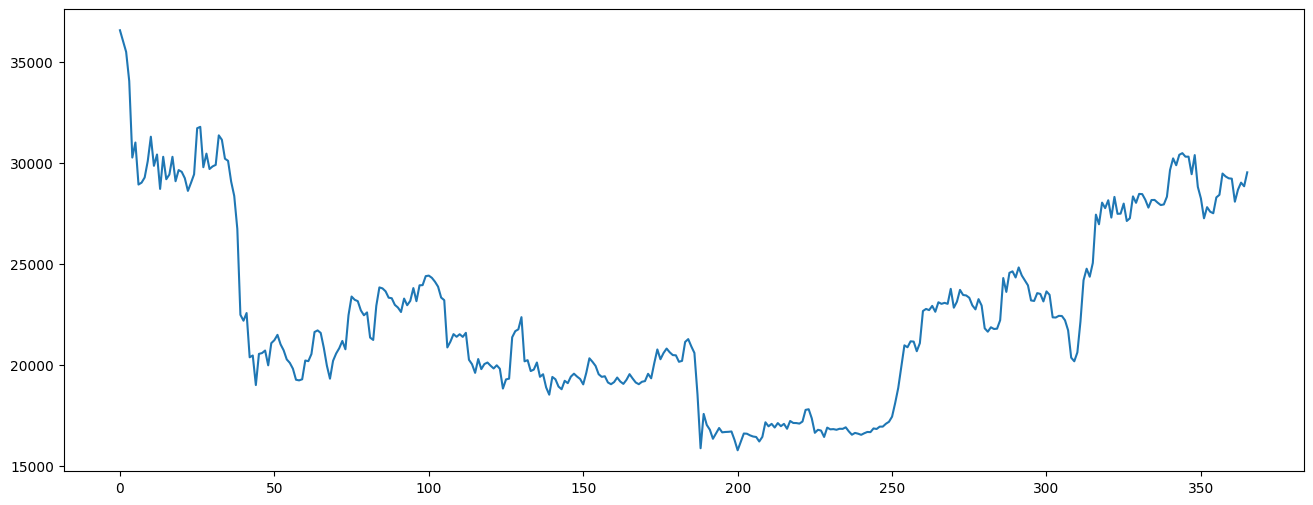

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
X = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
##X_train, X_test ,y_train, y_test = train_test_split(X,y, random_state=0)
X_train, X_test ,y_train, y_test = train_test_split(X,y,train_size = 0.7)

In [ ]:
X_train.shape

(256, 4)

In [ ]:
X_test.shape

(110, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[-6.97710499e-01  9.18773288e-01  7.67923803e-01 -5.56773028e-09]


In [ ]:
print(regressor.intercept_)

333.81128449475


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(X_test)

             Open          High           Low       Volume
326  27132.888672  27460.718750  26677.818359  17783600385
117  19799.582031  20420.990234  19799.582031  33225232872
322  28324.111328  28388.437500  27039.265625  25980310960
232  16796.976563  16864.703125  16793.527344   9744636213
160  19156.966797  19453.328125  18319.822266  44219840004
..            ...           ...           ...          ...
14   30311.119141  30664.976563  28793.605469  30749382605
128  21678.542969  21770.552734  21406.945313  34493951963
127  21376.912109  21760.275391  21168.722656  36913738894
106  20872.841797  21350.806641  20856.730469  27595671000
104  23341.039063  23563.832031  23177.601563  23747613147

[110 rows x 4 columns]


In [ ]:
predicted.shape

(110,)

In [ ]:
dframe =pd.DataFrame(y_test, predicted)

Gia thuc te : y_test , Gia du doan : predicted

In [ ]:
dfr=pd.DataFrame({'Actual Price': y_test, 'Predicted Price': predicted})

In [ ]:
print(dfr)

     Actual Price  Predicted Price
326  27268.130859     27020.602275
117  20049.763672     20301.276555
322  27493.285156     27273.763812
232  16847.755859     16951.116997
160  19382.904297     18663.016100
..            ...              ...
14   29200.740234     29299.677299
128  21769.255859     21457.516394
127  21680.539063     21462.115294
106  21166.060547     21249.895756
104  23212.738281     23364.754328

[110 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual Price,Predicted Price
326,27268.130859,27020.602275
117,20049.763672,20301.276555
322,27493.285156,27273.763812
232,16847.755859,16951.116997
160,19382.904297,18663.016100
30,29906.662109,29803.717327
262,22934.431641,22978.198427
343,30485.699219,30549.584582
79,22609.164063,22766.035523
217,17133.152344,17206.621035


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
regressor.score(X_test,y_test)

0.9951449270521937

In [ ]:
import math

In [ ]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error 221.35924685424766


In [ ]:
print('Mean Squared Error', metrics.mean_squared_error(y_test,predicted))

Mean Squared Error 107637.80326779388


In [ ]:
print('Root Mean Squared Error',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error 328.0820069247838


In [ ]:
graph=dfr.head(20)

In [ ]:
future_day = 30

In [ ]:
last_30_days = X_test[-future_day:]

In [ ]:
# Tạo biểu đồ
